In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




## **Difference between matplotlib and seaborn**
### <p> -Simply matplotlib is used to make graphs and charts whereas seaborn is built on top of matplotlib to create its visualisations using matplotlib.
### -Sns provides higher level interface for creating visualisation.

In [3]:
df= pd.read_csv(r'C:\Users\Admin\Desktop\violence_data.csv')


## **You may wonder why r' ?**</br>
### <p >It is to specify string literal. If we haven't used r' we had to use '\\' (double slash). We are trying to avoid confusion with escape special character which also use backslashes.</p>

In [4]:
print(df.head())


   RecordID      Country Gender Demographics Question  \
0         1  Afghanistan      F        Marital status   
1         1  Afghanistan      F             Education   
2         1  Afghanistan      F             Education   
3         1  Afghanistan      F             Education   
4         1  Afghanistan      F        Marital status   

          Demographics Response                   Question Survey Year  Value  
0                 Never married  ... if she burns the food  01/01/2015    NaN  
1                        Higher  ... if she burns the food  01/01/2015   10.1  
2                     Secondary  ... if she burns the food  01/01/2015   13.7  
3                       Primary  ... if she burns the food  01/01/2015   13.8  
4  Widowed, divorced, separated  ... if she burns the food  01/01/2015   13.8  


In [8]:
print(df.dtypes)

RecordID                   int64
Country                   object
Gender                    object
Demographics Question     object
Demographics Response     object
Question                  object
Survey Year               object
Value                    float64
dtype: object


Since the data type of survey year is in string format. If we want to do date-time specific operations like resampling,time-based slicing and more then it's important to covert that data to datetime format.

In [5]:
df['Survey Year']= pd.to_datetime(df['Survey Year'])

In [6]:
df['Survey Year']

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
12595   2015-01-01
12596   2015-01-01
12597   2015-01-01
12598   2015-01-01
12599   2015-01-01
Name: Survey Year, Length: 12600, dtype: datetime64[ns]

To check for missing values. We see missing values for each column using isnull() method. i.e.
Why .sum() ?
Because sum() will treat true and false boolean value as o and 1. It sums up and returns the count of missing values in each column.

In [7]:
df.isnull().sum()

RecordID                    0
Country                     0
Gender                      0
Demographics Question       0
Demographics Response       0
Question                    0
Survey Year                 0
Value                    1413
dtype: int64

Check for duplicates

In [12]:
df.duplicated().sum()

0

In [8]:
df['year'] = df['Survey Year'].dt.year
df['month'] = df['Survey Year'].dt.month
df['day'] = df['Survey Year'].dt.day
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,year,month,day
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,2015-01-01,NaN,2015,1,1
1,1,Afghanistan,F,Education,Higher,... if she burns the food,2015-01-01,10.1,2015,1,1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,2015-01-01,13.7,2015,1,1
3,1,Afghanistan,F,Education,Primary,... if she burns the food,2015-01-01,13.8,2015,1,1
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015-01-01,13.8,2015,1,1


We split year,month and day for easierness using .dt attribute.

In [9]:

df["year"].value_counts()



2013    1980
2015    1800
2014    1620
2016    1440
2017    1260
2012    1080
2011     720
2008     540
2006     360
2018     360
2010     180
2002     180
2009     180
2005     180
2003     180
2001     180
2000     180
2007     180
Name: year, dtype: int64

In [10]:
df= df.rename(columns={'Survey year': 'survey','Demographics Question': 'demoQ','Demographics Response': 'demoR'})

In [11]:
import plotly.express as px
fig=px.line(df.groupby(by="year").count().demoQ,title='Violence against Women by year',markers=True)
fig.show()

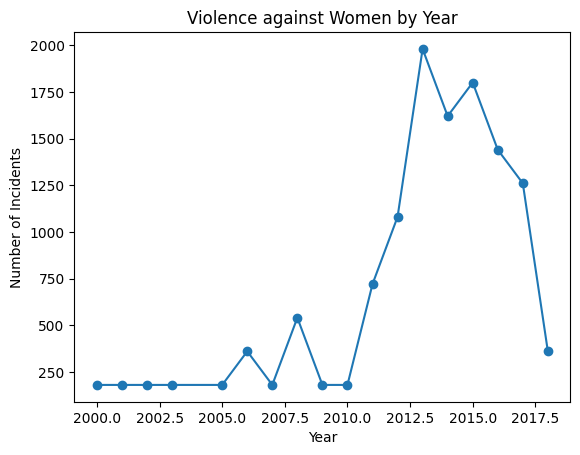

In [12]:
import matplotlib.pyplot as plt

# group the data by year and count the number of incidents in each year
counts_by_year = df.groupby(by='year').count().demoQ

# create a new figure and axis object using Matplotlib
fig, ax = plt.subplots()

# create a line plot of the counts by year using Matplotlib
ax.plot(counts_by_year.index, counts_by_year.values, '-o')

# set the title and axis labels
ax.set_title('Violence against Women by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')

# show the plot
plt.show()

In [13]:
df["day"].value_counts()

1    12600
Name: day, dtype: int64

In [15]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

In [17]:
df['demoQ'].unique().tolist()

['Marital status', 'Education', 'Employment', 'Age', 'Residence']

In [18]:
df.Question.unique().tolist()

['... if she burns the food',
 '... for at least one specific reason',
 '... if she argues with him',
 '... if she goes out without telling him',
 '... if she neglects the children',
 '... if she refuses to have sex with him']

In [19]:
Nepal=df[df.Country=='Nepal']
Nepal.head(3)

,RecordID,Country,Gender,demoQ,demoR,Question,Survey Year,Value,year,month,day
8460,398,Nepal,F,Age,15-24,... for at least one specific reason,2016-01-01,30.3,2016,1,1
8461,398,Nepal,F,Age,25-34,... for at least one specific reason,2016-01-01,28.2,2016,1,1
8462,398,Nepal,F,Age,35-49,... for at least one specific reason,2016-01-01,26.8,2016,1,1
